In [8]:
import datetime
import os
import glob
import gc
import pandas as pd
import xarray as xr
import numpy as np
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import colors

plt.style.use('science.mplstyle')
projectdir = '/glade/campaign/uwyo/wyom0112/berkeley/'

Figure 1
- demonstrate that the domains are in the western united states and show exactly where each domain is
- show that the resolutions are different and that the higher-resoution domains are nested within the lower-resolution domains
- show where and what size the huc 2 basins are, for intution later
- plot the topography, to show that the WUS has complext topography and that the higher-resolution domains contain some of the most complex topography

In [9]:
## fig 1 data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
huc2 = gpd.read_file(f'{projectdir}/fos-data/spatialdata/huc2.shp')
huc6 = gpd.read_file(f'{projectdir}/fos-data/spatialdata/huc6.shp')
metapath = '/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/'
coords1 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d01')
coords2 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d02')
coords4 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d04')
coords3 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d03')
coords_dict = {'d01': coords1, 
               'd02': coords2,
               'd03': coords3,
               'd04': coords4}

In [10]:
# us epa level iii ecoregions:
ecoreg = gpd.read_file('../../us_eco_l3.shp')
ecoregrp = ecoreg.to_crs('epsg:4326')

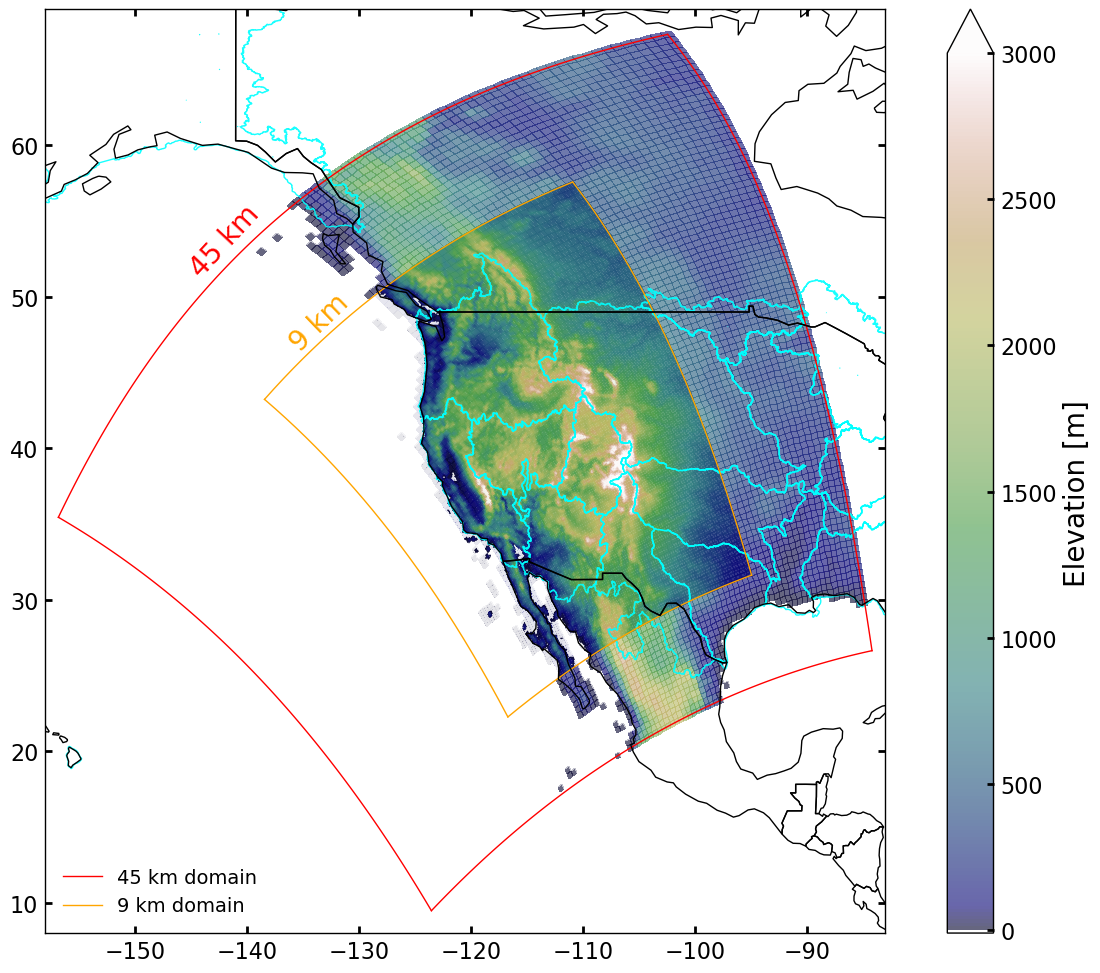

In [11]:
## fig 1 code with no 3km 
cmap = mpl.cm.gist_earth
new_cmap = cmap(np.arange(cmap.N))
vmin = -10
vmax = 3000
thresh = 10
thresh_idx = int((thresh - vmin) / (vmax - vmin) * cmap.N)
new_cmap[:thresh_idx, :] = 1.0  # RGB values for white
new_cmap = colors.ListedColormap(new_cmap)

clist = [[coords1, 'red',-145.5 ,51.4, '45 km', 47],
         [coords2, 'orange', -136.6 ,46.5, '9 km', 44],]
#         [coords3, 'black', -130 ,41, '3 km', 40],
#         [coords4, 'black', -113 ,44.1, '  ', 40]]
fig,ax = plt.subplots(figsize=(16, 12))

for coords, color, lx, ly, l, rot in clist:
    cb = ax.pcolormesh(coords['XLONG'][0], coords['XLAT'][0], coords['HGT'][0], 
                  cmap =new_cmap, vmin = vmin, vmax = vmax, alpha = 0.6)
    ax.plot([0,1],[0,1], color = color, label = f'{l} domain')
    
    ax.plot(coords['XLONG'][0,:,0], coords['XLAT'][0,:,0], color =  color)
    ax.plot(coords['XLONG'][0,:,-1], coords['XLAT'][0,:,-1], color =  color)
    ax.plot(coords['XLONG'][0,0,:], coords['XLAT'][0,0,:], color = color)
    ax.plot(coords['XLONG'][0,-1,:], coords['XLAT'][0,-1,:], color = color)
    ax.text(lx,ly,l, color = color, fontsize = 20, zorder = 5, rotation = rot)

    
world.boundary.plot(ax=ax, linewidth =1 )
huc2.boundary.plot(ax=ax, linewidth = 1, label = 'HUC2 boundaries', color = 'cyan', alpha = 0.9, zorder = 1)

handles, labels = plt.gca().get_legend_handles_labels()

plt.colorbar(cb, extend  = 'max', label = 'Elevation [m]')    
indices = [0, 1] # , 2, 4] 
selected_handles = [handles[i] for i in indices]
selected_labels = [labels[i] for i in indices]
plt.legend(selected_handles, selected_labels, loc = 'lower left', 
           frameon = False)
ax.set_xlim((-158,-83))
ax.set_ylim((8,69))
plt.savefig('../figures/map_45_9.jpg', dpi = 400)
plt.show()

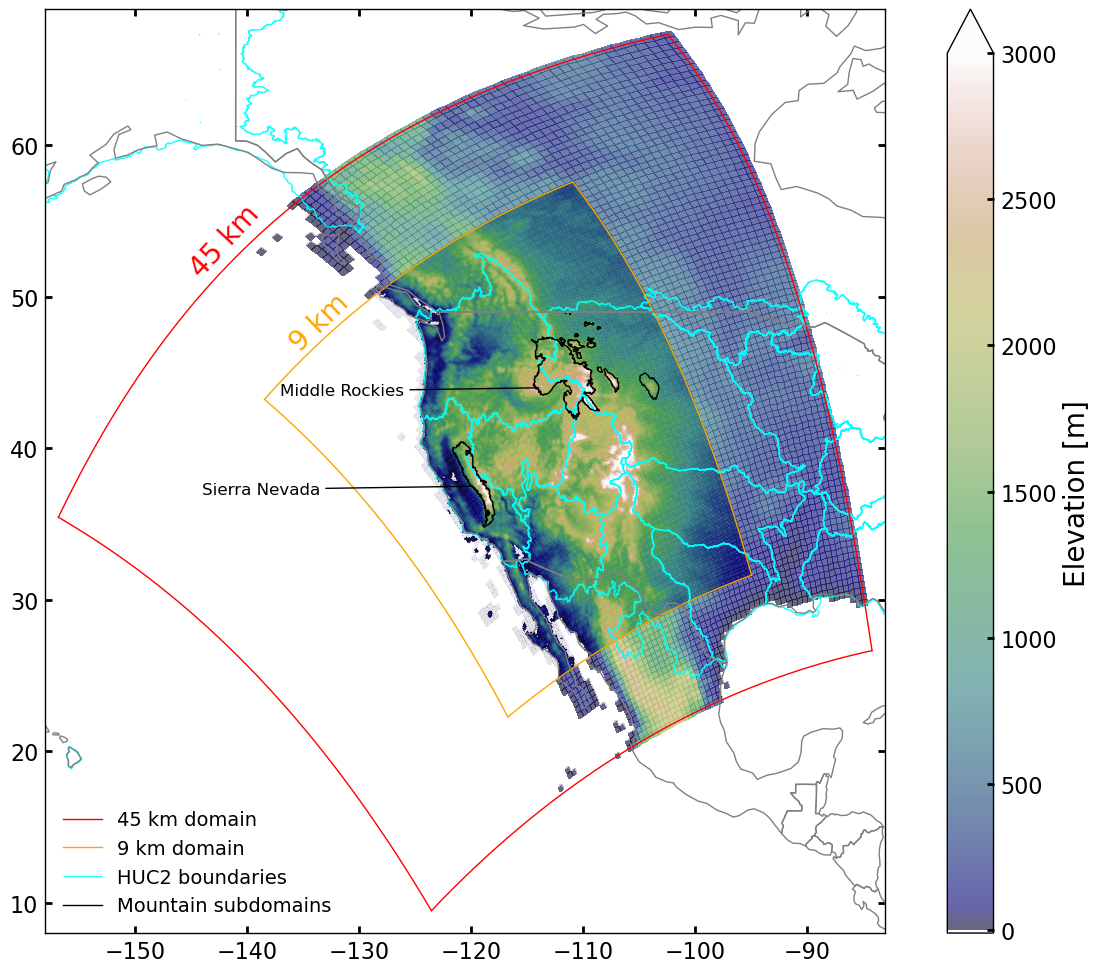

In [13]:
## fig 1 code
cmap = mpl.cm.gist_earth
new_cmap = cmap(np.arange(cmap.N))
vmin = -10
vmax = 3000
thresh = 10
thresh_idx = int((thresh - vmin) / (vmax - vmin) * cmap.N)
new_cmap[:thresh_idx, :] = 1.0  # RGB values for white
new_cmap = colors.ListedColormap(new_cmap)


boundaries = {'d01':{'CA': [43,60,35,68],
                     'WY': [68,81,43,63]},
              'd02':{'CA': [44,125,87,251],
                     'WY': [165,230,130,227]}}

a,b,c,d = boundaries['d02']['CA']
e,f,g,h = boundaries['d02']['WY']
clist = [[coords1, 'red', -145.5 ,51.4, '45 km', 47, '-'],
         [coords2, 'orange', -136.6 ,46.5, '9 km', 44, '-'],]
         # [coords2.sel(south_north = slice(c,d)).sel(west_east = slice(a,b)), 'black', -130 ,41, 'Sierra Nevada', 40, '--'],
         # [coords2.sel(south_north = slice(g,h)).sel(west_east = slice(e,f)), 'black', -116 ,45.7, 'Middle Rockies', 30,'--']]

fig,ax = plt.subplots(figsize=(16, 12))

for coords, color, lx, ly, l, rot, ls in clist:
    cb = ax.pcolormesh(coords['XLONG'][0], coords['XLAT'][0], coords['HGT'][0], 
                   cmap =new_cmap, vmin = vmin, vmax = vmax, alpha = 0.6)
    ax.plot([0,1],[0,1], color = color, linestyle = ls, label = f'{l} domain')
    
    ax.plot(coords['XLONG'][0,:,0], coords['XLAT'][0,:,0], color =  color, linestyle = ls)
    ax.plot(coords['XLONG'][0,:,-1], coords['XLAT'][0,:,-1], color =  color, linestyle = ls)
    ax.plot(coords['XLONG'][0,0,:], coords['XLAT'][0,0,:], color = color, linestyle = ls)
    ax.plot(coords['XLONG'][0,-1,:], coords['XLAT'][0,-1,:], color = color, linestyle = ls)
    ax.text(lx,ly,l, color = color, fontsize = 20, zorder = 5, rotation = rot)


ecoregrp[ecoregrp.US_L3NAME == 'Middle Rockies'].boundary.plot(ax = ax)
ecoregrp[ecoregrp.US_L3NAME == 'Sierra Nevada'].boundary.plot(ax = ax)

world.boundary.plot(ax=ax, linewidth =1 , color = 'gray', label = 'Mountain Subdomains')
huc2.boundary.plot(ax=ax, linewidth = 1, label = 'HUC2 boundaries', color = 'cyan', alpha = 0.9, zorder = 1)


plt.colorbar(cb, extend  = 'max', label = 'Elevation [m]')    

ax.plot([0,0],[0,0], 'k-', label = 'Mountain subdomains')
handles, labels = plt.gca().get_legend_handles_labels()

indices = [0, 1, 3,4] 
# labels[2] = 'Mountain subdomains'
selected_handles = [handles[i] for i in indices]
selected_labels = [labels[i] for i in indices]
plt.legend(selected_handles, selected_labels, loc = 'lower left', 
            frameon = False)

ax.set_xlim((-158,-83))
ax.set_ylim((8,69))

ax.annotate(
    'Sierra Nevada',
    xy=(-119.6, 37.5),  # Point to annotate
    xytext=(-144,37.0),  # Text location
    arrowprops=dict(arrowstyle='-', linewidth=1),  # Line properties
    fontsize=12
) # )
ax.annotate(
    'Middle Rockies',
    xy=(-113.7, 44),  # Point to annotate
    xytext=(-137,43.5),  # Text location
    arrowprops=dict(arrowstyle='-', linewidth=1),  # Line properties
    fontsize=12  # 
)

plt.savefig('../figures/map_45_9_reg.jpg', dpi = 400)

plt.show()